In [2]:
!pip install lazypredict

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_alzheimer/pubchem_fp.csv')

In [6]:
data

,Unnamed: 0,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.30
1,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.57
2,2,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.74
3,3,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.96
4,4,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,1386,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.11
1387,1387,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.50
1388,1388,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.53
1389,1389,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.82


In [7]:
X=data.drop('pIC50', axis=1)
y=data.pIC50

In [8]:
X.shape

(1391, 882)

In [9]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(1391, 174)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [01:17<00:00,  1.84s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [01:14<00:00,  1.78s/it]


In [14]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,1.00,1.00,0.00,0.09
ExtraTreeRegressor,1.00,1.00,0.00,0.11
ExtraTreesRegressor,1.00,1.00,0.00,2.21
XGBRegressor,0.99,0.99,0.13,1.71
GaussianProcessRegressor,0.99,0.99,0.14,0.64
RandomForestRegressor,0.95,0.96,0.26,2.58
BaggingRegressor,0.94,0.95,0.30,0.36
MLPRegressor,0.90,0.91,0.39,2.21
HistGradientBoostingRegressor,0.90,0.91,0.39,1.09


In [16]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.31,0.74,0.64,1.93
BaggingRegressor,0.31,0.74,0.64,0.21
LGBMRegressor,0.29,0.73,0.65,0.21
HistGradientBoostingRegressor,0.27,0.73,0.66,2.46
GradientBoostingRegressor,0.26,0.72,0.66,2.25
XGBRegressor,0.22,0.71,0.68,0.90
KNeighborsRegressor,0.16,0.69,0.70,0.04
SVR,0.15,0.68,0.71,0.24
NuSVR,0.15,0.68,0.71,0.32


[(0.0, 1.0)]

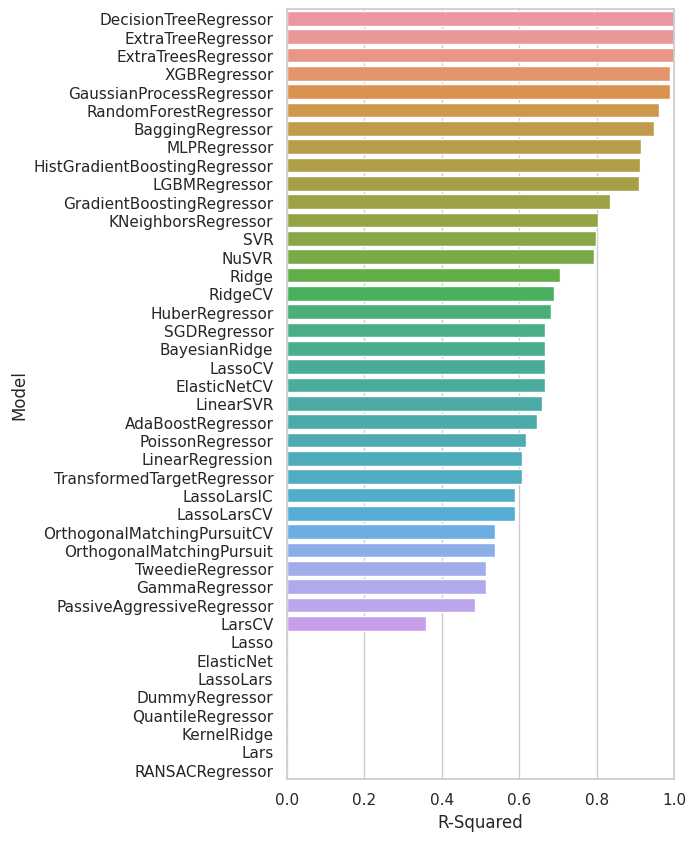

In [17]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

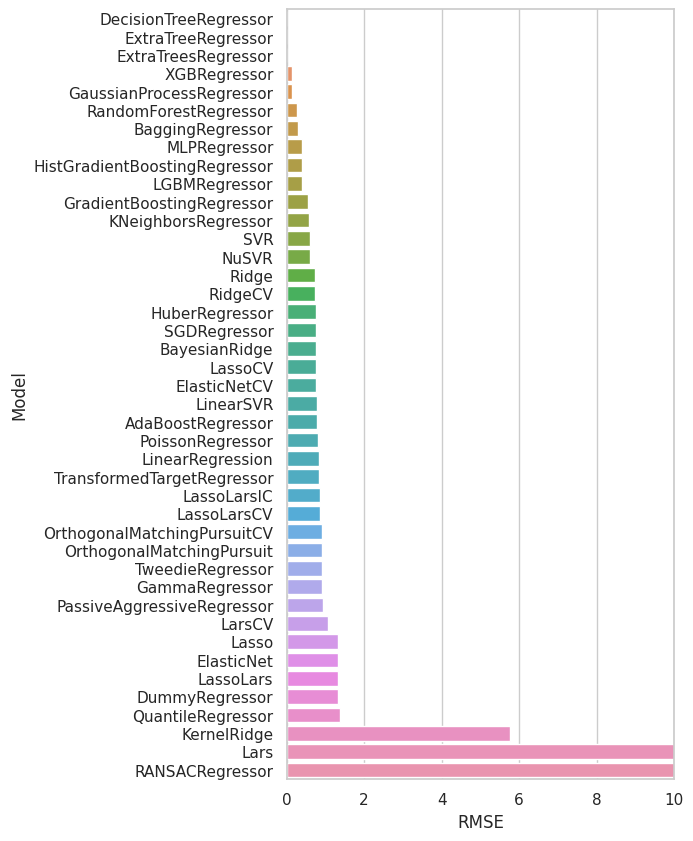

In [18]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

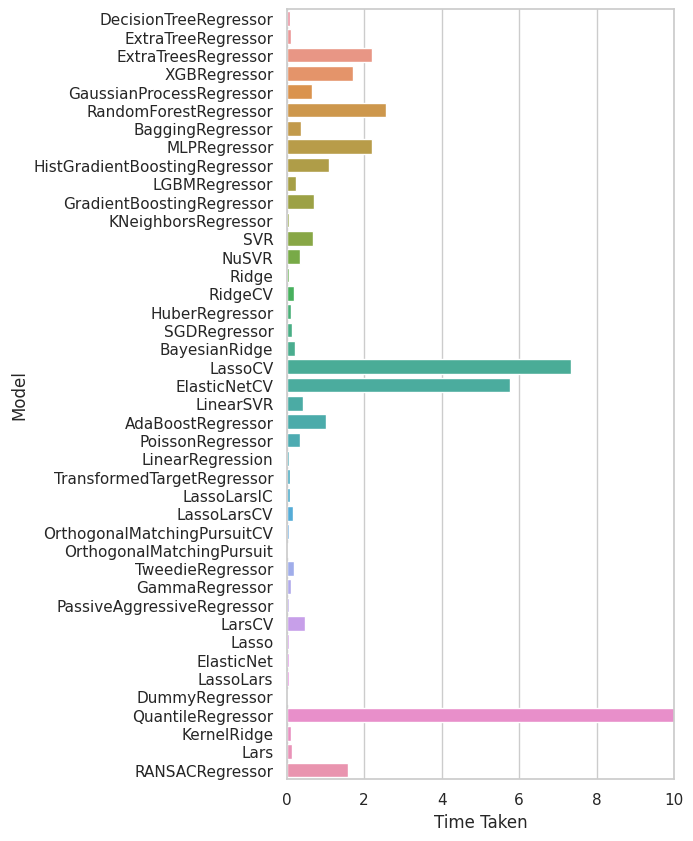

In [19]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))
